Number of people in each state of depression:
Mild depression                 294
Moderate Depression             185
No depression                   118
Moderately Severe Depression     64
Severe Depression                11
Name: Depression State, dtype: int64

Correlation coefficient between Age range and PHQ-9 collective score: 0.0041682931388765665


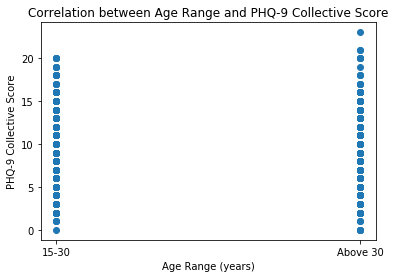

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

df = pd.read_csv("E:\CSU Work\Thesis and RA\dataset_3\depression_scale_PHQ.csv")
question1 = df.columns[10]
question2 = df.columns[11]
question3 = df.columns[12]
question4 = df.columns[13]
question5 = df.columns[14]
question6 = df.columns[15]
question7 = df.columns[16]
question8 = df.columns[17]
question9 = df.columns[18]
# label Encoding for Data Transformation and Normalization
distance_mapping = {
    "Not at all (0)": 0,
    "Several days (1)": 1,
    "Half of days (2)": 2,
    "Nearly every day (3)": 3,
}
df[question1] = df[question1].map(distance_mapping)
df[question2] = df[question2].map(distance_mapping)
df[question3] = df[question3].map(distance_mapping)
df[question4] = df[question4].map(distance_mapping)
df[question5] = df[question5].map(distance_mapping)
df[question6] = df[question6].map(distance_mapping)
df[question7] = df[question7].map(distance_mapping)
df[question8] = df[question8].map(distance_mapping)
df[question9] = df[question9].map(distance_mapping)
# Convert Nominal Data to Ordinal
df['Age range in years'] = df['Age range in years'].map({'15-30': 25, 'Above 30': 50})
#Filter only useful Data
df = df[['Age range in years',question1,question2,question3,question4,question5,question6,question7,question8,question9]]
#Calculate the xollective score for each age group
df['Collective Score'] = df.iloc[:, 1:].sum(axis=1)
# Function to determine state of depression based on collective score
def determine_depression_state(score):
    if score >= 0 and score <= 4:
        return 'No depression'
    elif score >= 5 and score <= 9:
        return 'Mild depression'
    elif score >= 10 and score <= 14:
        return 'Moderate Depression'
    elif score >= 15 and score <= 19:
        return 'Moderately Severe Depression'
    elif score >= 20 and score <= 27:
        return 'Severe Depression'

# Apply function to determine depression state
df['Depression State'] = df['Collective Score'].apply(determine_depression_state)

# Count the number of people in each state of depression
depression_counts = df['Depression State'].value_counts()

# Calculate the correlation coefficient between Age range and PHQ-9 collective score
correlation_coefficient = df['Age range in years'].corr(df['Collective Score'])

# Print results
print("Number of people in each state of depression:")
print(depression_counts)
print("\nCorrelation coefficient between Age range and PHQ-9 collective score:", correlation_coefficient)


# Plot the Correlation
plt.scatter(df['Age range in years'], df['Collective Score'])
plt.title('Correlation between Age Range and PHQ-9 Collective Score')
plt.xlabel('Age Range (years)')
plt.ylabel('PHQ-9 Collective Score')
# Rename with the original data
plt.xticks([25, 50], ['15-30', 'Above 30'])
plt.show()